### Laptop Battery Life - Done

Fred is a very predictable man. For instance, when he uses his laptop, all he does is watch TV shows. He keeps on watching TV shows until his battery dies. Also, he is a very meticulous man, i.e. he pays great attention to minute details. He has been keeping logs of every time he charged his laptop, which includes how long he charged his laptop for and after that how long was he able to watch the TV. Now, Fred wants to use this log to predict how long will he be able to watch TV for when he starts so that he can plan his activities after watching his TV shows accordingly.

You are given access to Fred’s laptop charging log by reading from the file “trainingdata.txt”. The training data file will consist of 100 lines, each with 2 comma-separated numbers.

1. The first number denotes the amount of time the laptop was charged.
2. The second number denotes the amount of time the battery lasted.

Your score will be 10-X, where X is the sum of the distances you are from expected answer of each test case. For instance if there are 2 test cases with expected answer 4 and you print 3 for the first one and 6 for the second one your score will be 10-(1+2) = 7.

In [48]:
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import linear_model

In [95]:
data = pd.read_csv('https://s3.amazonaws.com/hr-testcases/399/assets/trainingdata.txt', 
                   header = None, names = ['charged', 'lasted'])

In [14]:
data.head(10)

,charged,lasted
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80
5,7.82,8.00
6,7.02,8.00
7,5.50,8.00
8,9.15,8.00
9,4.87,8.00


In [17]:
data.describe()

,charged,lasted
count,100.000000,100.000000
mean,4.573000,6.206800
std,2.788603,2.454116
min,0.000000,0.000000
25%,1.987500,3.975000
50%,4.375000,8.000000
75%,6.522500,8.000000
max,11.720000,8.000000


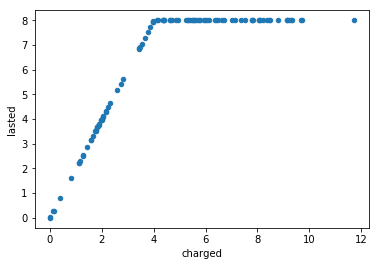

In [71]:
data.plot.scatter('charged', 'lasted',)

There is some pattern: if battery is charged more than 4 hours, it lasts for 8 hours. 

In [45]:
data[data['charged'] >= 4].describe()

,charged,lasted
count,54.000000,54.0
mean,6.721481,8.0
std,1.808197,0.0
min,4.110000,8.0
25%,5.345000,8.0
50%,6.380000,8.0
75%,8.075000,8.0
max,11.720000,8.0


Perfectly lasted 8 hours, while the batteries charged less than 4 hours, lasted strictly less than 8 hours.

In [54]:
data[data['charged'] < 4].describe()

,charged,lasted
count,46.000000,46.000000
mean,2.050870,4.101739
std,1.102437,2.204875
min,0.000000,0.000000
25%,1.475000,2.950000
50%,1.940000,3.880000
75%,2.685000,5.370000
max,3.990000,7.980000


Build SLR on the filtered data: s.t. charging time < 4

In [98]:
sub_data = data[data['charged'] < 4]
sub_data.insert(0, "intercept", [0]*46, True)

In [105]:
x = sub_data.iloc[:, 0:2]
y = sub_data.lasted.values.reshape(46, 1)

In [108]:
slr = linear_model.LinearRegression(fit_intercept=True)
slr.fit(x, y)
slr.coef_

array([[0., 2.]])

In [110]:
# to see the predicted values for the training dataset
slr.predict(x)

array([[5.62],
       [5.44],
       [7.74],
       [3.8 ],
       [0.28],
       [4.  ],
       [1.6 ],
       [0.  ],
       [3.56],
       [6.9 ],
       [7.06],
       [3.52],
       [0.04],
       [4.12],
       [4.48],
       [2.22],
       [4.66],
       [3.66],
       [2.28],
       [3.5 ],
       [4.32],
       [2.52],
       [7.94],
       [3.96],
       [3.32],
       [4.08],
       [7.54],
       [3.66],
       [4.3 ],
       [3.16],
       [2.54],
       [6.94],
       [3.7 ],
       [0.26],
       [2.88],
       [6.84],
       [3.78],
       [3.96],
       [0.78],
       [3.98],
       [3.16],
       [7.98],
       [5.16],
       [7.94],
       [7.3 ],
       [2.2 ]])

In [111]:
def predict_battery_life(timeCharged):
    if timeCharged >= 4:
        return 8.0
    else:
        # coefficient: beta1 = 2.0, beta0 = 0.0
        return 2*timeCharged

In [113]:
predict_battery_life(4.5)

8.0

<hr/>

### Stock Predictions - 
